In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Load the interactions summary from Human Promoter Analysis

In [2]:
df = pd.read_csv('Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [3]:
df.shape

(5974, 12)

In [4]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter3,2,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.016772,48.0,270.0,3010.0,2948.0,6.184242e-14,6.459804e-14
1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,90.0,3171.0,4207.0,4.378854e-56,8.588613e-56
2,filter0<-->filter10,9,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.OBP1_col_a_m1,0.012554,204.0,12.0,4111.0,4074.0,3.357739e-101,1.901549e-100
3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,132.0,174.0,4527.0,6147.0,9.012392e-03,9.045785e-03
4,filter0<-->filter14,13,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,HB_tnt.ATHB40_col_a_m1,0.028770,300.0,180.0,3544.0,5005.0,9.709964e-19,1.054589e-18


##### keep significant interactions

In [5]:
df = df[df['adjusted_pval']<0.05]

In [6]:
df.shape

(5944, 12)

In [9]:
df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

In [10]:
df.shape

(1495, 12)

### Get TF-TF interactions

In [17]:
df['TF_interaction'] = df.apply(lambda x: x['motif1']+r'$\longleftrightarrow$'+x['motif2'], axis=1)

In [18]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction
0,1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,90.0,3171.0,4207.0,4.378854e-56,8.588613e-56,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
1,3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,132.0,174.0,4527.0,6147.0,9.012392e-03,9.045785e-03,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
2,5,filter0<-->filter15,14,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,WRKY_tnt.WRKY7_colamp_a_m1,0.000399,6.0,108.0,5715.0,6349.0,1.542976e-63,3.549264e-63,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
3,6,filter0<-->filter18,17,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.001660,6.0,6.0,4963.0,6403.0,4.722691e-35,6.296491e-35,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
4,7,filter0<-->filter20,19,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.009442,114.0,30.0,5974.0,7357.0,1.219896e-17,1.311985e-17,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...


In [19]:
df = df[df['motif1']!=df['motif2']]

In [20]:
df = df.reset_index()
df.shape

(1378, 15)

In [21]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['motif1'][i]
    TF2 = df['motif2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Distribution of mean distance of interaction

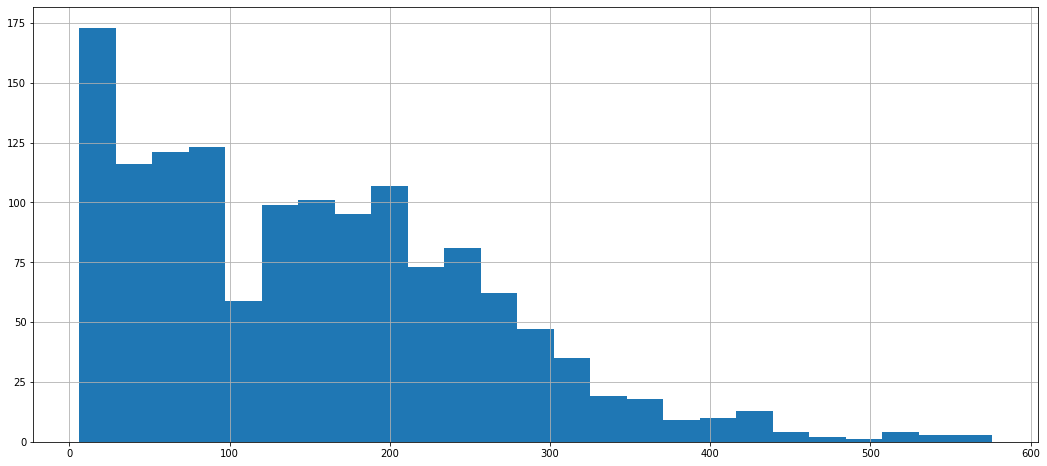

In [22]:
df['mean_distance'].hist(bins=25, figsize=(18,8))

In [23]:
df['mean_distance'].mean(),df['mean_distance'].median()

(152.3425253991292, 138.0)

### Most Frequent TF Family Interactions

In [24]:
df['TF_A_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF_B_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [25]:
df.head(10)

,level_0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family
0,0,1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,90.0,3171.0,4207.0,4.378854e-56,8.588613e-56,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,MYB
1,1,3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,132.0,174.0,4527.0,6147.0,9.012392e-03,9.045785e-03,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like
2,2,5,filter0<-->filter15,14,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,WRKY_tnt.WRKY7_colamp_a_m1,0.000399,6.0,108.0,5715.0,6349.0,1.542976e-63,3.549264e-63,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,WRKY
3,3,6,filter0<-->filter18,17,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.001660,6.0,6.0,4963.0,6403.0,4.722691e-35,6.296491e-35,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2C2dof
4,4,7,filter0<-->filter20,19,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.009442,114.0,30.0,5974.0,7357.0,1.219896e-17,1.311985e-17,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like
5,5,12,filter0<-->filter32,31,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB39_colamp_a_m1,0.006642,294.0,120.0,1097.0,2209.0,3.582209e-21,3.987182e-21,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,MYB
6,6,14,filter0<-->filter34,33,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,WRKY_tnt.WRKY31_col_a_m1,0.009805,186.0,222.0,2869.0,3539.0,1.003540e-41,1.494811e-41,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,WRKY
7,7,15,filter0<-->filter36,35,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.001142,6.0,258.0,5546.0,6574.0,4.741705e-34,6.218128e-34,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like
8,8,16,filter0<-->filter37,36,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,AP2EREBP_tnt.At1g77640_col_a_m1,0.001130,264.0,348.0,2379.0,2801.0,1.246158e-52,2.274052e-52,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,AP2EREBP
9,9,19,filter0<-->filter41,40,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.000004,144.0,246.0,5294.0,6842.0,1.501095e-24,1.736601e-24,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like


In [26]:
df['Family_Interaction'] = df.apply(lambda x: x['TF_A_Family']+r'$\longleftrightarrow$'+x['TF_B_Family'],axis=1)

In [27]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF_A_Family'][i]
    TF2 = df['TF_B_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [28]:
df.head()

,level_0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family,Family_Interaction
0,0,1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,90.0,3171.0,4207.0,4.378854e-56,8.588613e-56,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,MYB,Trihelix$\longleftrightarrow$MYB
1,1,3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,132.0,174.0,4527.0,6147.0,9.012392e-03,9.045785e-03,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like,Trihelix$\longleftrightarrow$G2like
2,2,5,filter0<-->filter15,14,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,WRKY_tnt.WRKY7_colamp_a_m1,0.000399,6.0,108.0,5715.0,6349.0,1.542976e-63,3.549264e-63,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,WRKY,Trihelix$\longleftrightarrow$WRKY
3,3,6,filter0<-->filter18,17,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.001660,6.0,6.0,4963.0,6403.0,4.722691e-35,6.296491e-35,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2C2dof,Trihelix$\longleftrightarrow$C2C2dof
4,4,7,filter0<-->filter20,19,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.009442,114.0,30.0,5974.0,7357.0,1.219896e-17,1.311985e-17,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like,Trihelix$\longleftrightarrow$G2like


In [29]:
df.shape

(1378, 18)

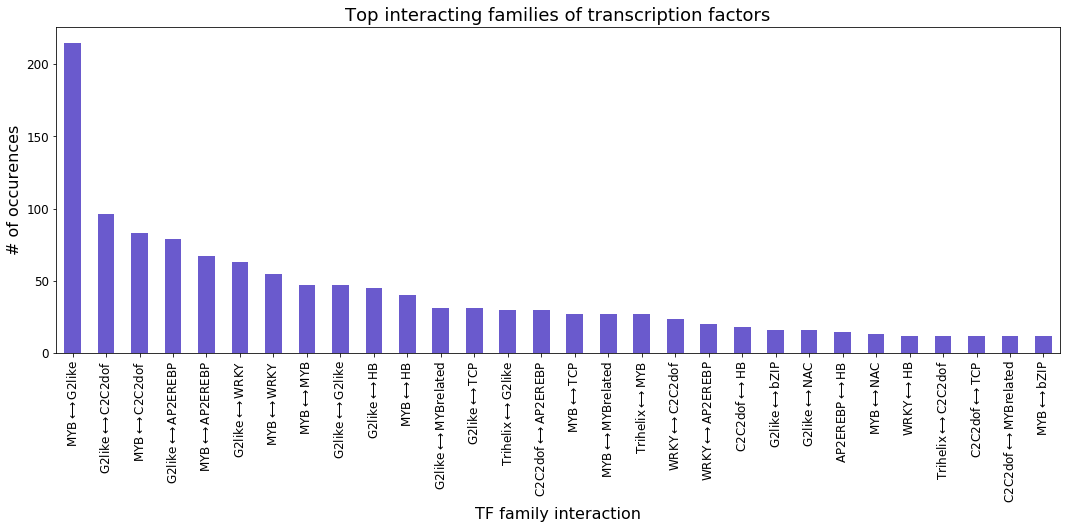

In [30]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_Arabidopsis.pdf',bbox_inches='tight')

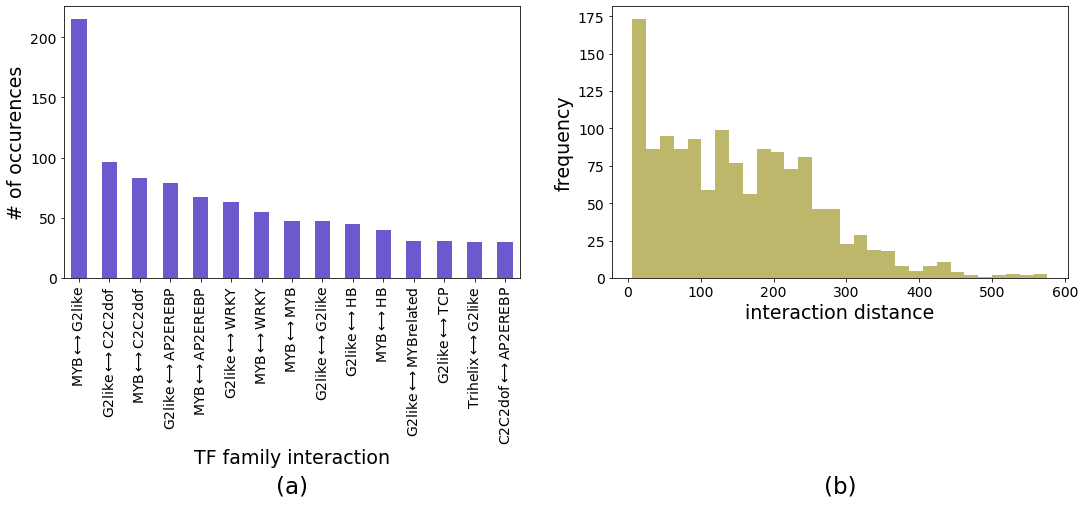

In [31]:
fig, axes = plt.subplots(1, 2)
#ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=12,ax=axes[0])
#ax1.set_xlabel("motif interaction",fontsize=16)
#ax1.set_ylabel("# of occurences",fontsize=16)
#ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)
ax1 = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=14,ax=axes[0])
ax1.set_xlabel("TF family interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Top interacting families of transcription factors',fontsize=18)


ax2 = df['mean_distance'].plot(kind='hist',bins=30, figsize=(18,5),color='darkkhaki',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=18)

ax1.text(0.5,-0.79, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.79, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_Arabidopsis.pdf',bbox_inches='tight')

In [54]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(230, 3.0)